In [2]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [3]:
sample = ["2Mu2E_100GeV_5GeV_400mm"]

fileset = utilities.make_fileset(sample, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = [
    "looseBarrelE_matched",
    "barrelE_matched",
    "barrelE_ID-EtaInSeed_matched",
    "barrelE_ID-DPhiIn_matched",
    "barrelE_ID-Inverse_matched",
    "barrelE_ID-sigmaIetaIeta_matched",
    "barrelE_ID-Iso_matched",
    "barrelE_ID-ConversionVeto_matched",
    "barrelE_ID-MissingHits_matched",
    "barrelE_ID-HE_matched",
    # "looseEndcapE"
    # "endcapE",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra", "electron_extra_2d"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]
hists = out["2Mu2E_100GeV_5GeV_400mm"]["hists"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  looseBarrelE_matched
Not applying any cuts to the lepton jets for channel  barrelE_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-EtaInSeed_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-DPhiIn_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-Inverse_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-sigmaIetaIeta_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-Iso_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-ConversionVeto_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-MissingHits_matched
Not applying any cuts to the lepton jets for channel  barrelE_ID-HE_matched
Not applying any cuts to the lepton jets for channel  looseBarrelE_matched
Not applying any cuts to the lepton jets for channel  barrelE_matched
Not applying any cuts to the lepton jets for channel 

In [5]:
#in each histogram you are able to see each selections of the ID variable cut by changing the channel number to correspond with the selections defined in channel

# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed.

Text(0, 1, 'Δηseed Barrel, n-1 cuts')

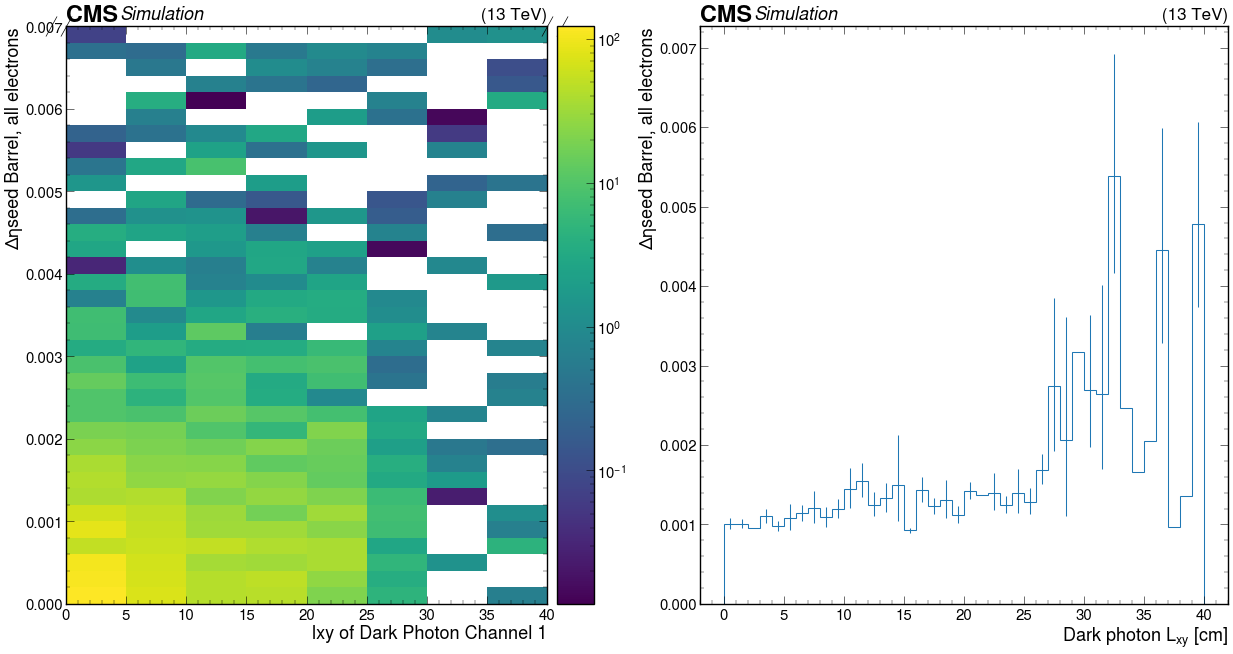

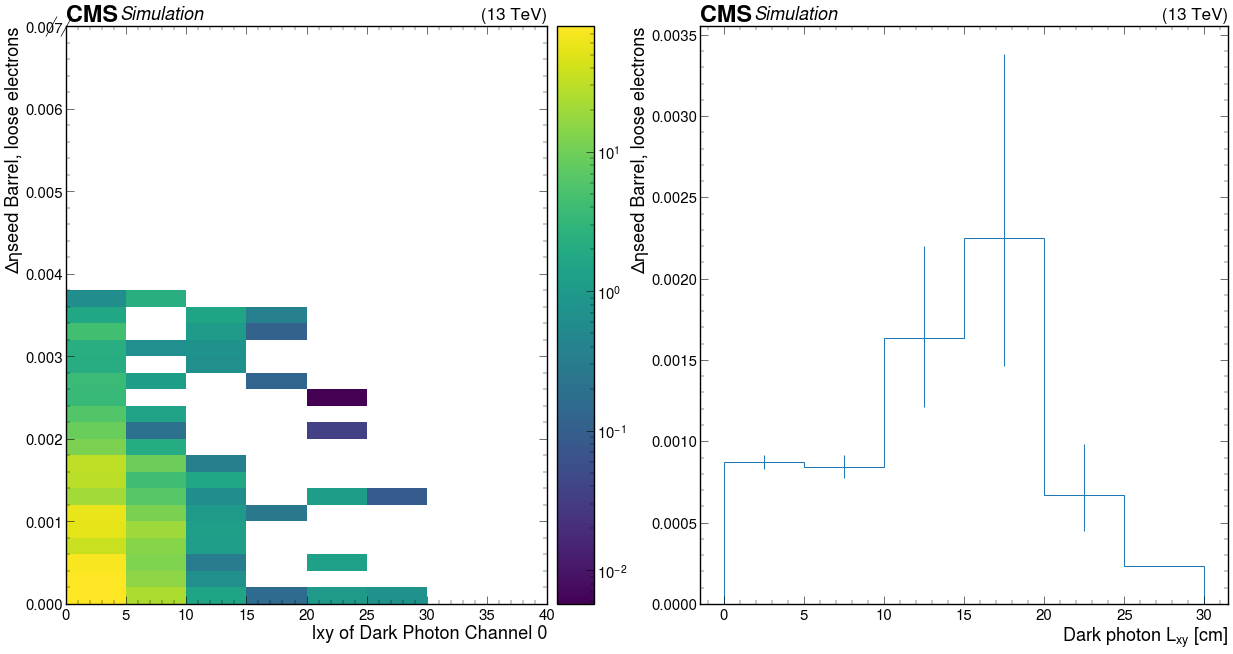

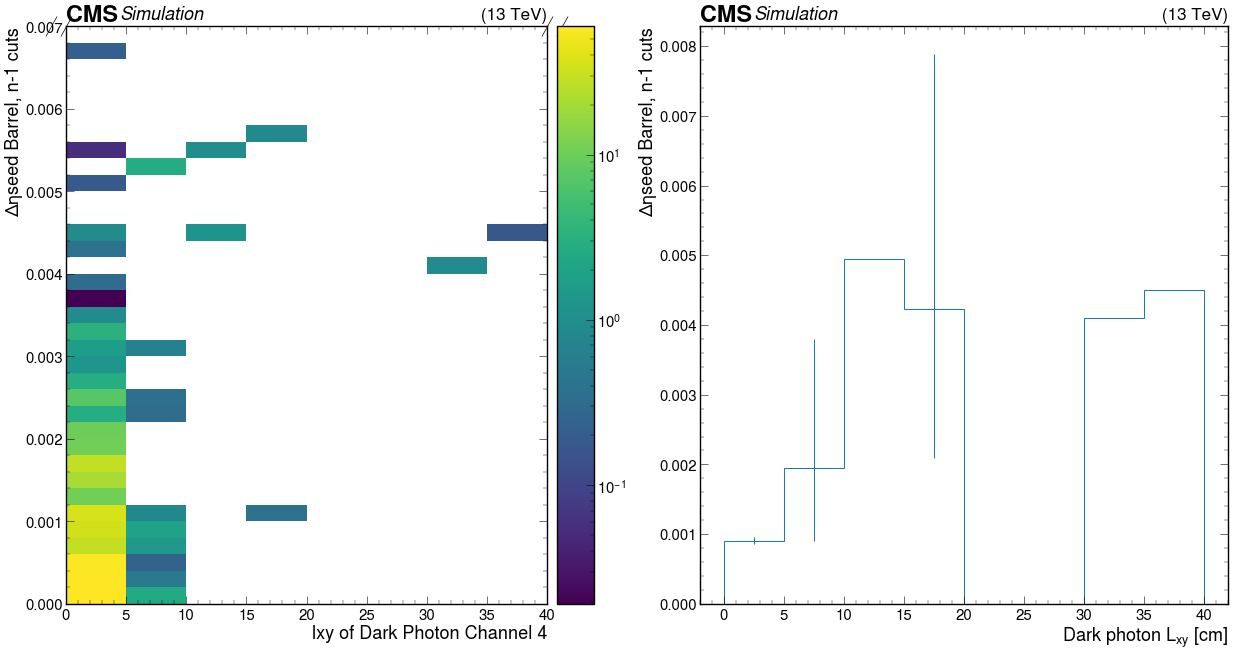

In [8]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Δηseed Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :40j:1j, :].profile(axis="electron_GsfEleDEtaInSeedCut"))
#print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 2, sum),:18]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Δηseed Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Δηseed Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0], :40j:5j, :].profile(axis="electron_GsfEleDEtaInSeedCut"))
#print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0],slice(0, 2, sum),:35]) 
plt.ylabel("Δηseed Barrel, loose electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"]["barrelE_ID-EtaInSeed_matched", :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 4")
plt.ylabel("Δηseed Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"]["barrelE_ID-EtaInSeed_matched", :40j:5j, :].profile(axis="electron_GsfEleDEtaInSeedCut"))
#print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2],slice(0, 2, sum),:35]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Δηseed Barrel, n-1 cuts")

#(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 2, sum),:])

# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

Text(0, 1, 'Δφin Barrel, n-1 cuts')

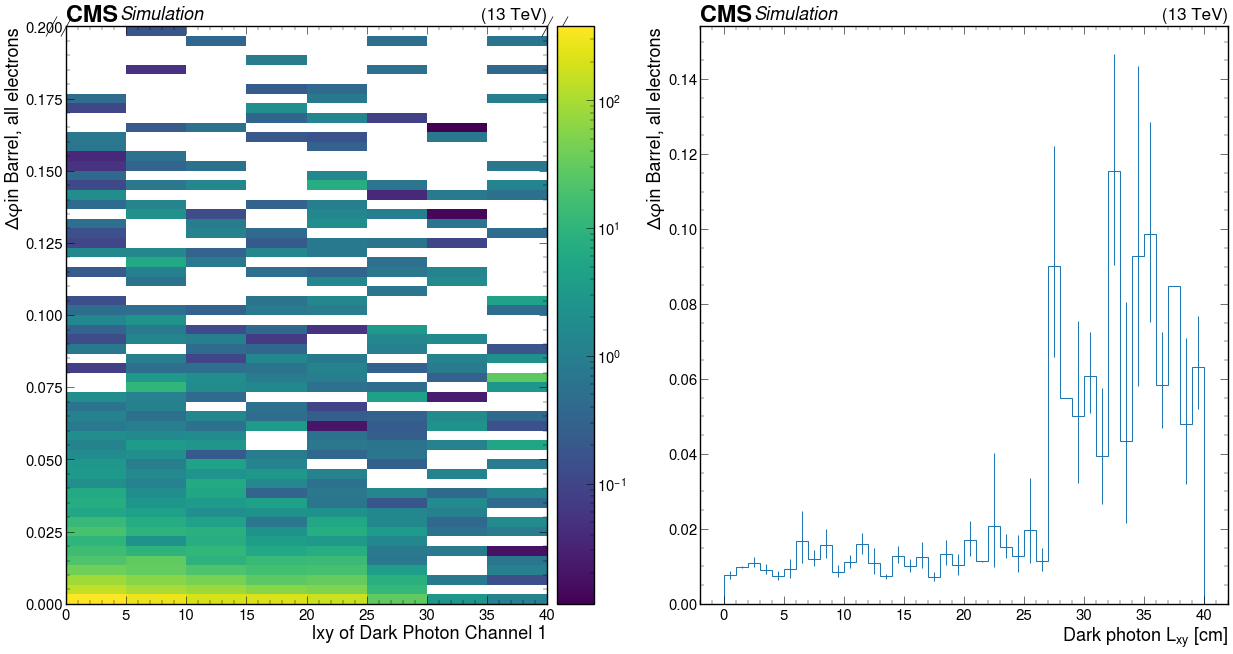

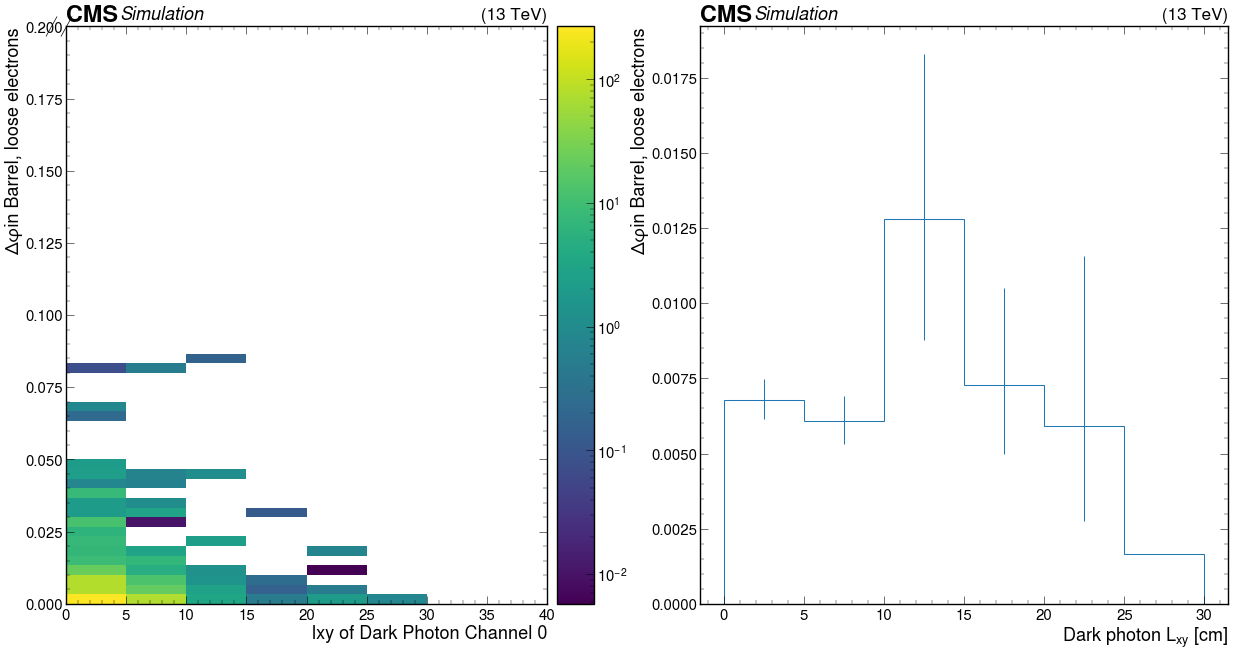

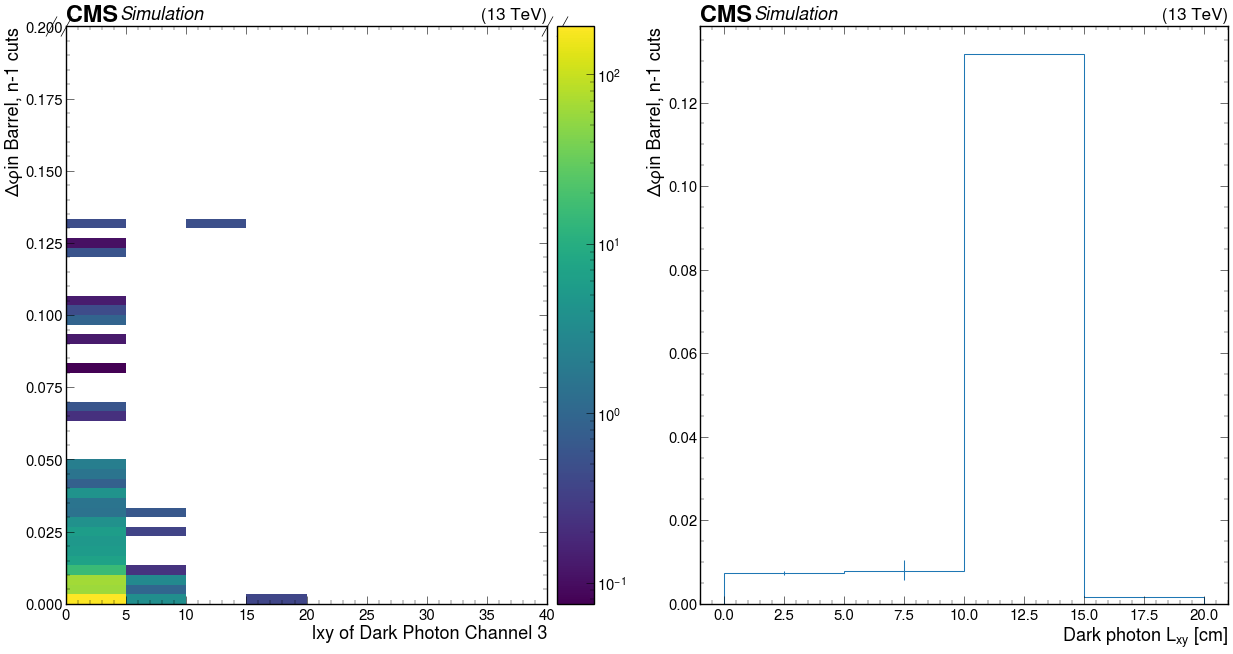

In [10]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Δφin Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :40j:1j, :].profile(axis="electron_GsfEleDPhiInCut"))
#print(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 2, sum),:26]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Δφin Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Δφin Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0], :40j:5j, :].profile(axis="electron_GsfEleDPhiInCut"))
#print(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(0, 2, sum),:76]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Δφin Barrel, loose electrons")


plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[3], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("Δφin Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[3], :40j:5j, :].profile(axis="electron_GsfEleDPhiInCut"))
#print(hists["electron_GsfEleDPhiInCut2d"][channels[4],slice(0, 2, sum),:76]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Δφin Barrel, n-1 cuts")



#(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 2, sum),:])

# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.

Text(0, 1, '|1/E - 1/p| Barrel, n-1 cuts')

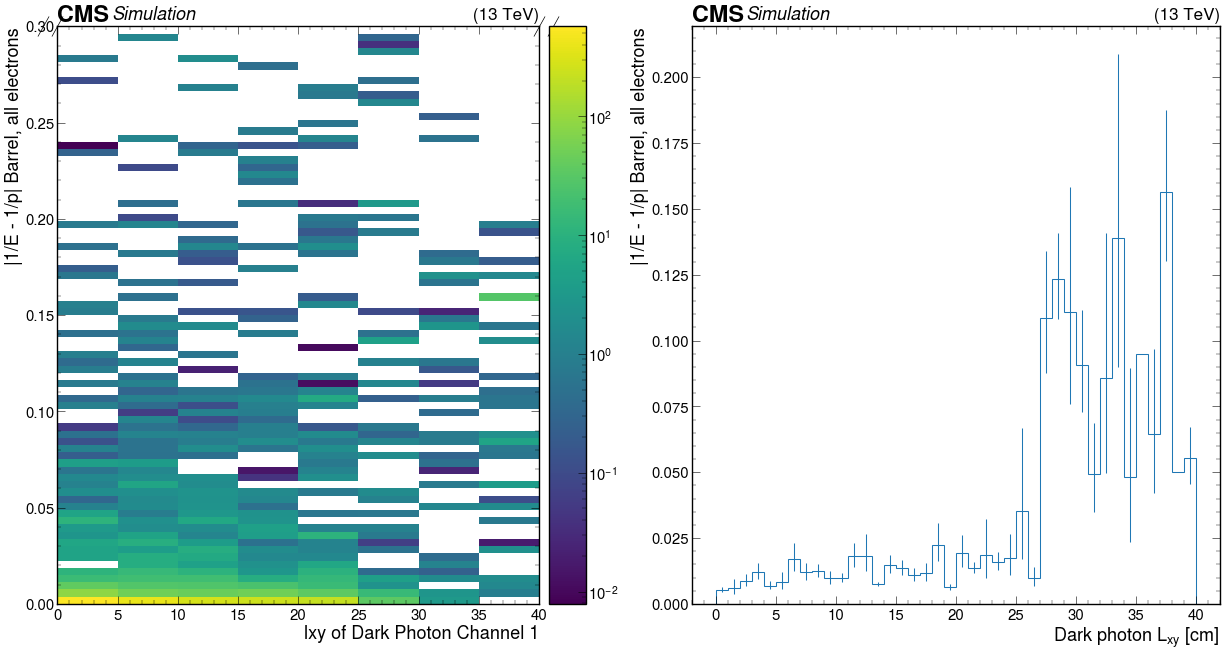

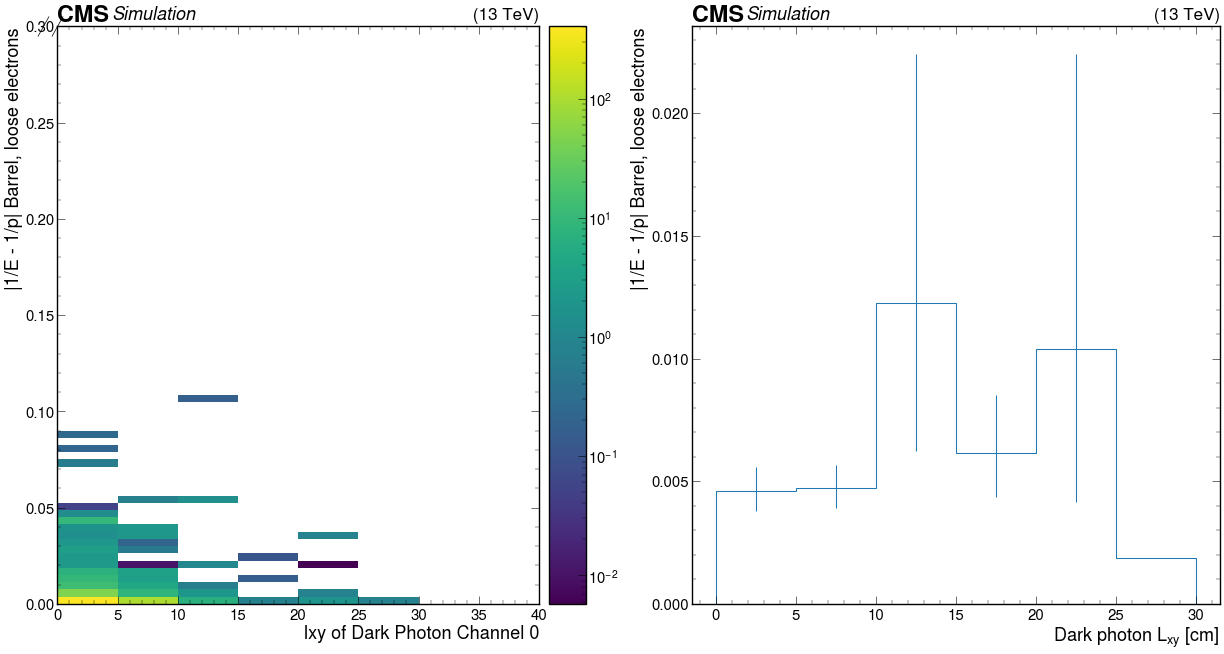

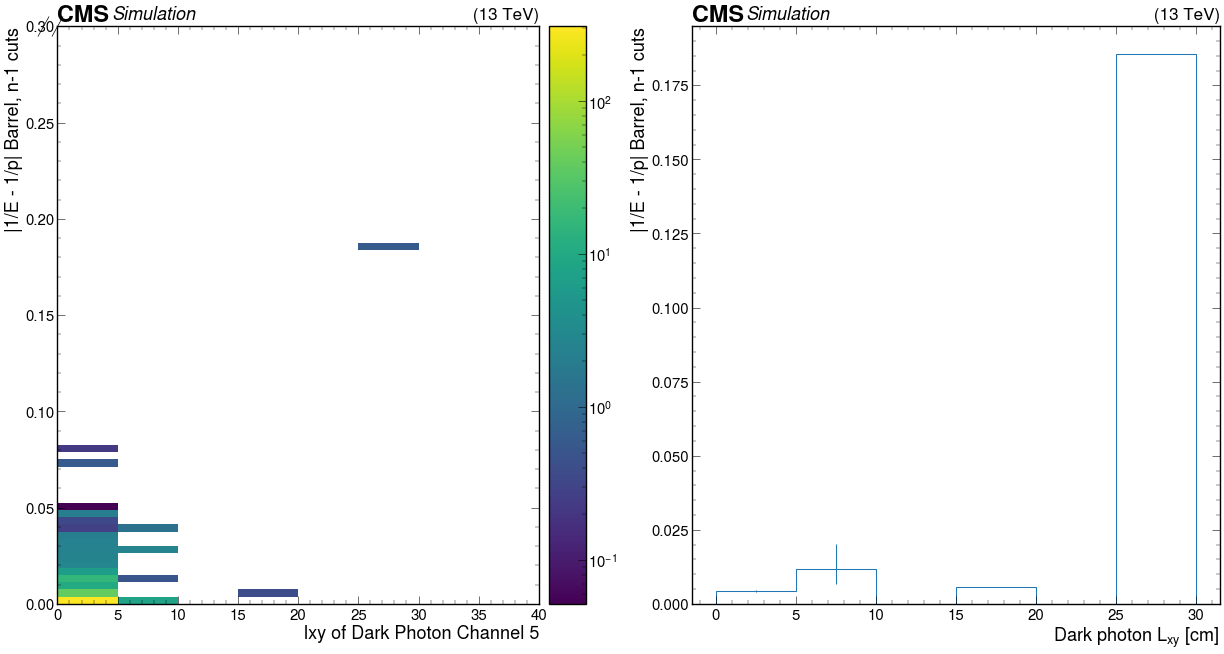

In [11]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("|1/E - 1/p| Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :40j:1j, :].profile(axis="electron_GsfEleEInverseMinusPInverseCut"))  
#print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(0, 2, sum),:51]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("|1/E - 1/p| Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("|1/E - 1/p| Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0], :40j:5j, :].profile(axis="electron_GsfEleEInverseMinusPInverseCut"))
#print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(0, 2, sum),:53]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("|1/E - 1/p| Barrel, loose electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[5], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 5")
plt.ylabel("|1/E - 1/p| Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[5], :40j:5j, :].profile(axis="electron_GsfEleEInverseMinusPInverseCut"))  
#print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2],slice(0, 2, sum),:53]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("|1/E - 1/p| Barrel, n-1 cuts")

#(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(0, 2, sum),:])

# Isolation:
relative isolation value with effective area corrections. It is calculated by considering all PFCandidates whose distance to the electron in question satisfies ∆R < 0.3 in the (η, φ) plane:

Iso = (Isoch + Isonh + Isopho)/pT

                     ┌───────────────────────────────────────────────────────┐
[ -inf,     0) 656.4 │████████████████████████████▋                          │
[    0, 0.005) 65    │██▉                                                    │
[0.005,  0.01) 45.82 │██                                                     │
[ 0.01, 0.015) 48.5  │██▏                                                    │
[0.015,  0.02) 31.4  │█▍                                                     │
[ 0.02, 0.025) 19.49 │▉                                                      │
[0.025,  0.03) 20.91 │▉                                                      │
[ 0.03, 0.035) 18.75 │▉                                                      │
[0.035,  0.04) 31.79 │█▍                                                     │
[ 0.04, 0.045) 33.89 │█▌                                                     │
[0.045,  0.05) 22.06 │█                                                      │
[ 0.05, 0.055) 13.42 │▋                             

Text(0, 1, 'Isolation Barrel, n-1 cuts')

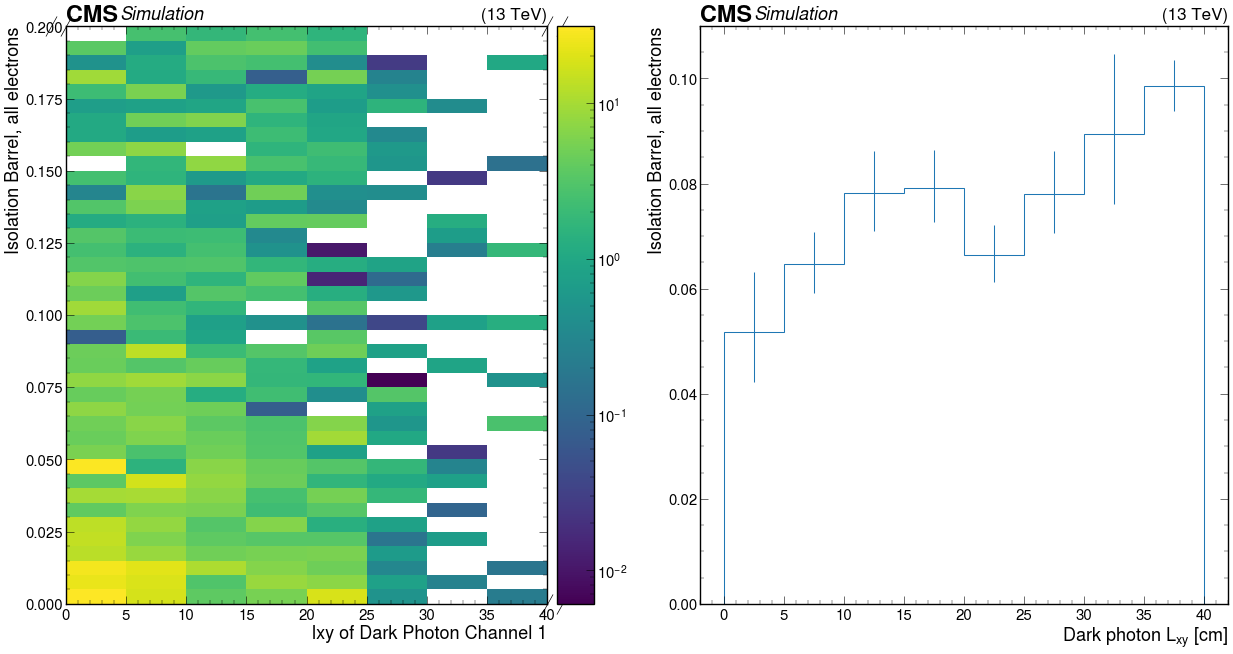

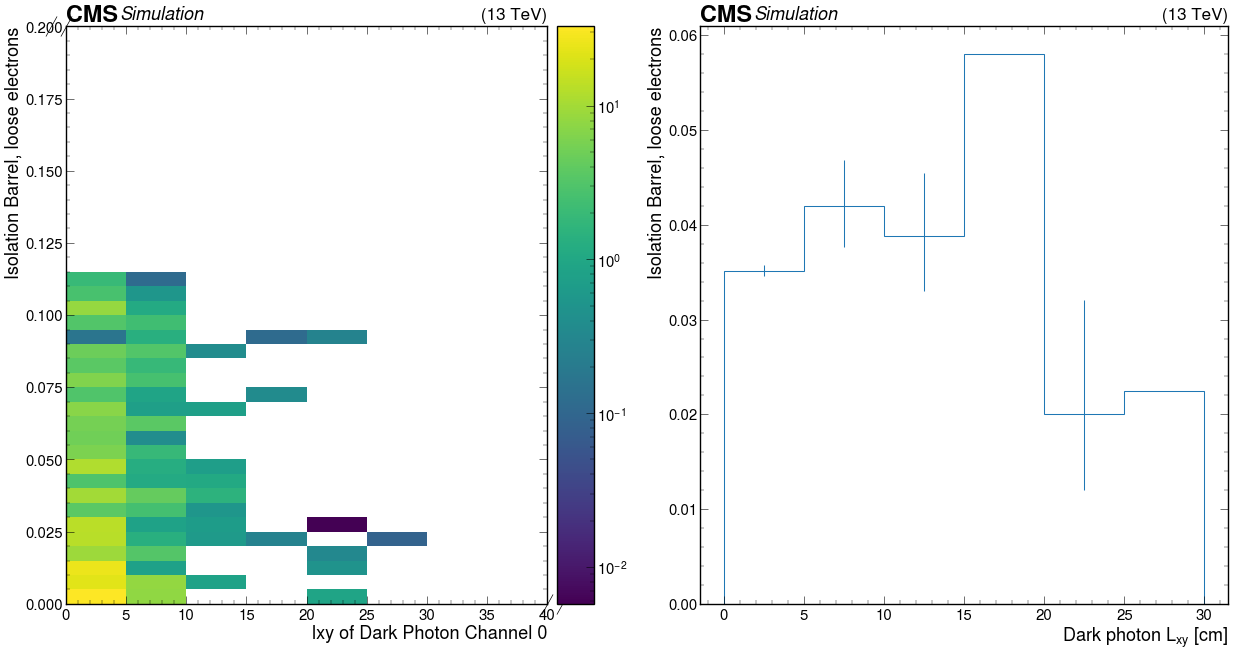

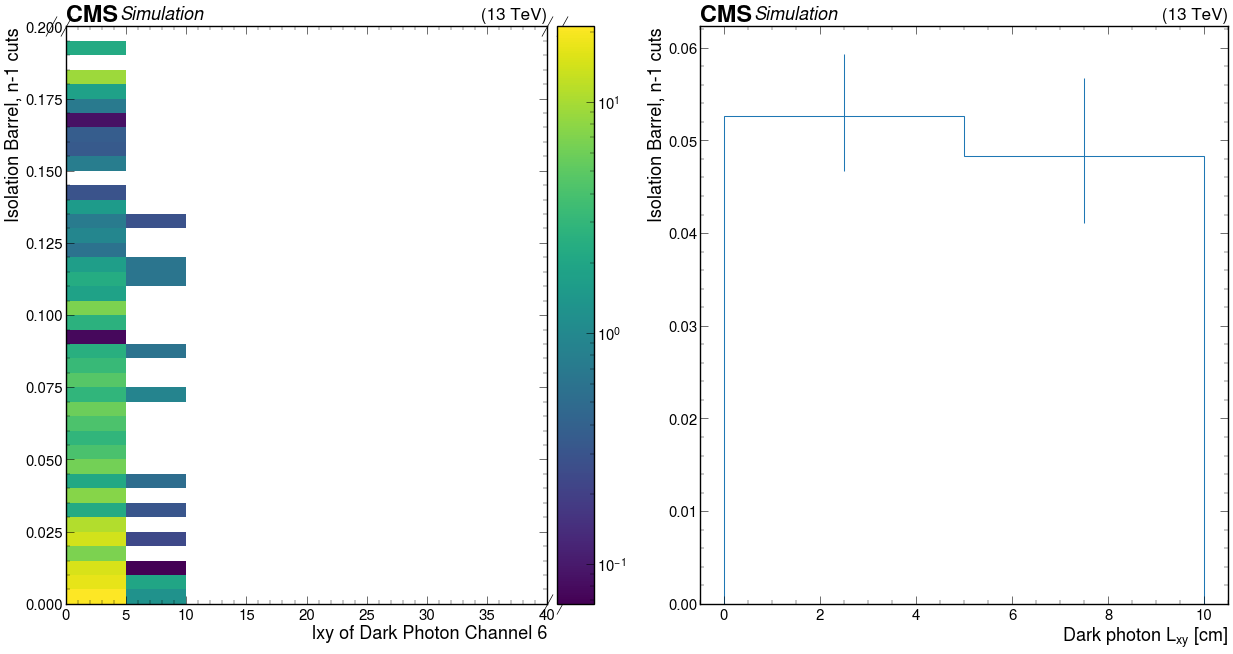

In [9]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Isolation Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1], :40j:5j, :].profile(axis="electron_GsfEleRelPFIsoScaledCut"))
print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(3, 101, sum),:22])   
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Isolation Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Isolation Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0], :40j:5j, :].profile(axis="electron_GsfEleRelPFIsoScaledCut"))
#print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0],slice(0, 2, sum),:]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Isolation Barrel, loose electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[6], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 6")
plt.ylabel("Isolation Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[6], :40j:5j, :].profile(axis="electron_GsfEleRelPFIsoScaledCut")) 
#print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[2],slice(3, 101, sum),:])   
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Isolation Barrel, n-1 cuts")

#(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0],slice(0, 2, sum),:])

# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

                         ┌───────────────────────────────────────────────────┐
[   -inf,       0) 0     │                                                   │
[      0, 0.00075) 0     │                                                   │
[0.00075,  0.0015) 0     │                                                   │
[ 0.0015, 0.00225) 0     │                                                   │
[0.00225,   0.003) 0     │                                                   │
[  0.003, 0.00375) 0     │                                                   │
[0.00375,  0.0045) 0     │                                                   │
[ 0.0045, 0.00525) 1.045 │▌                                                  │
[0.00525,   0.006) 3.675 │█▊                                                 │
[  0.006, 0.00675) 4.732 │██▎                                                │
[0.00675,  0.0075) 18.29 │████████▉                                          │
[ 0.0075, 0.00825) 48.05 │███████████████████████▍  

Text(0, 1, 'σiηiη Barrel, n-1 cuts')

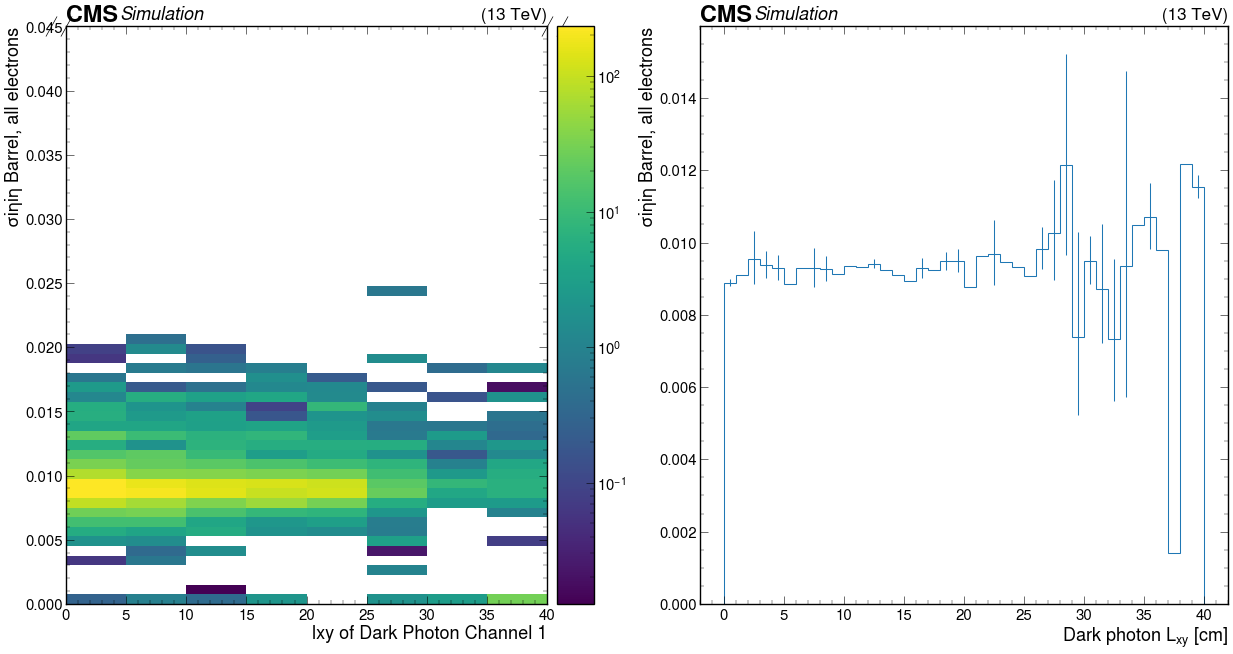

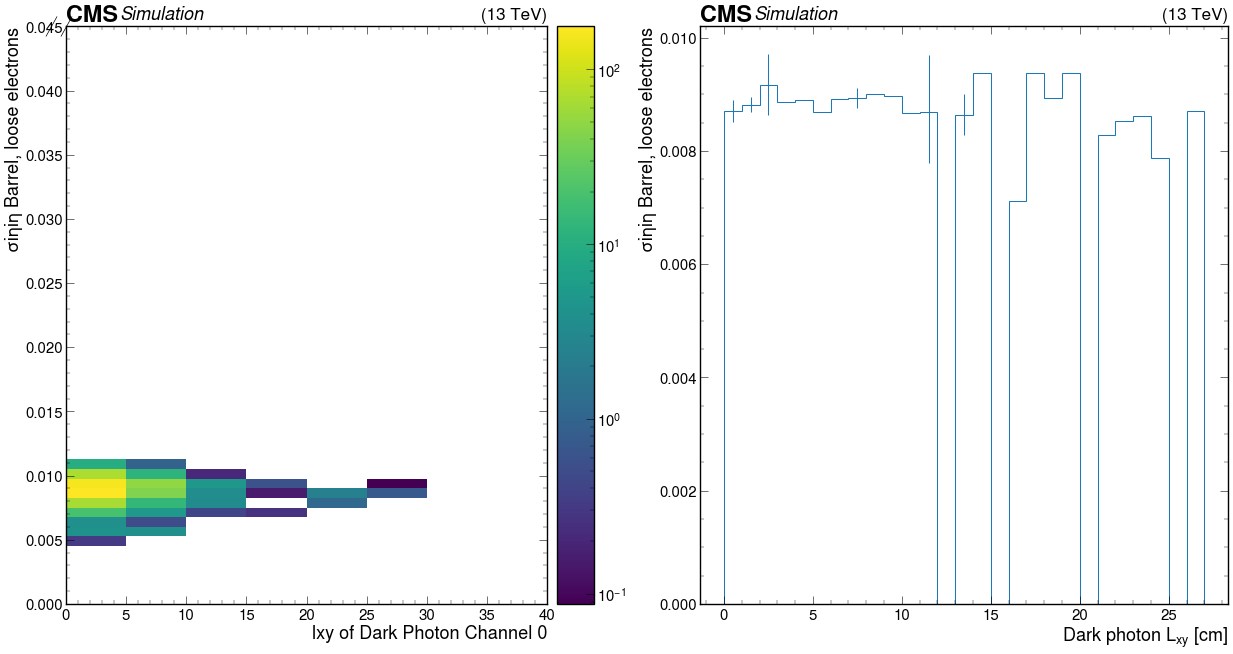

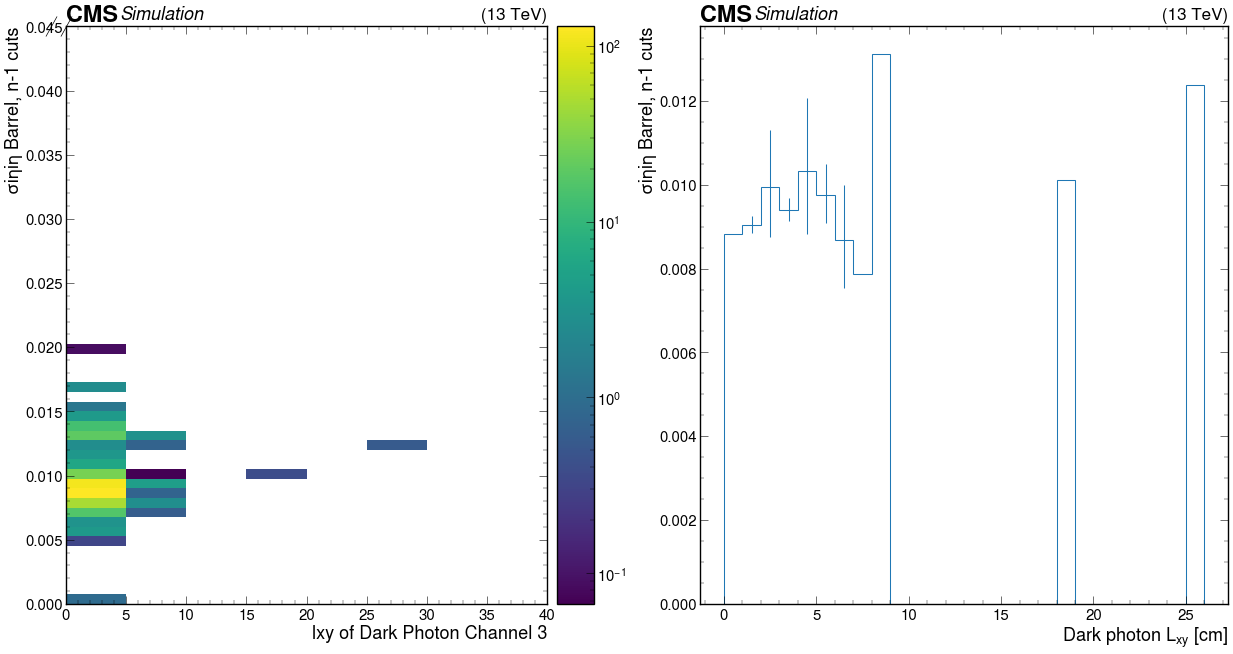

In [9]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("σiηiη Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :40j:1j, :].profile(axis="electron_GsfEleFull5x5SigmaIEtaIEtaCut"))
print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(0, 2, sum),:15]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("σiηiη Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("σiηiη Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :40j:1j, :].profile(axis="electron_GsfEleFull5x5SigmaIEtaIEtaCut"))
#print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(0, 2, sum),:35]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("σiηiη Barrel, loose electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"]["barrelE_ID-sigmaIetaIeta_matched", :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("σiηiη Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"]["barrelE_ID-sigmaIetaIeta_matched", :40j:1j, :].profile(axis="electron_GsfEleFull5x5SigmaIEtaIEtaCut"))
#print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3],slice(0, 2, sum),:35]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("σiηiη Barrel, n-1 cuts")


#(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(0, 2, sum),:])

# Conversion veto: 

veto designed to identify electrons from photon conversions. A simple test to determine whether an electron fails or passes through the ID in an event. 

                   ┌─────────────────────────────────────────────────────────┐
[-inf,   0) 0      │                                                         │
[   0,   1) 0.3139 │                                                         │
[   1, inf) 315.2  │████████████████████████████████████████████████████████ │
                   └─────────────────────────────────────────────────────────┘


/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(0, 1, 'Conversion Veto Barrel n-1 cuts')

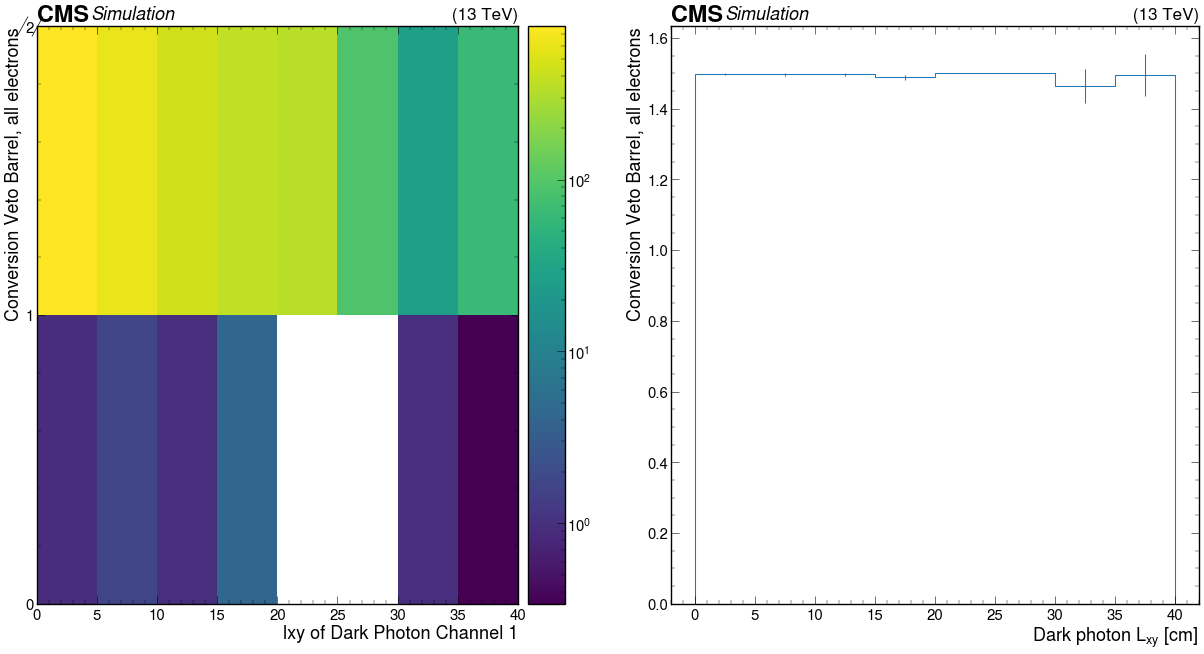

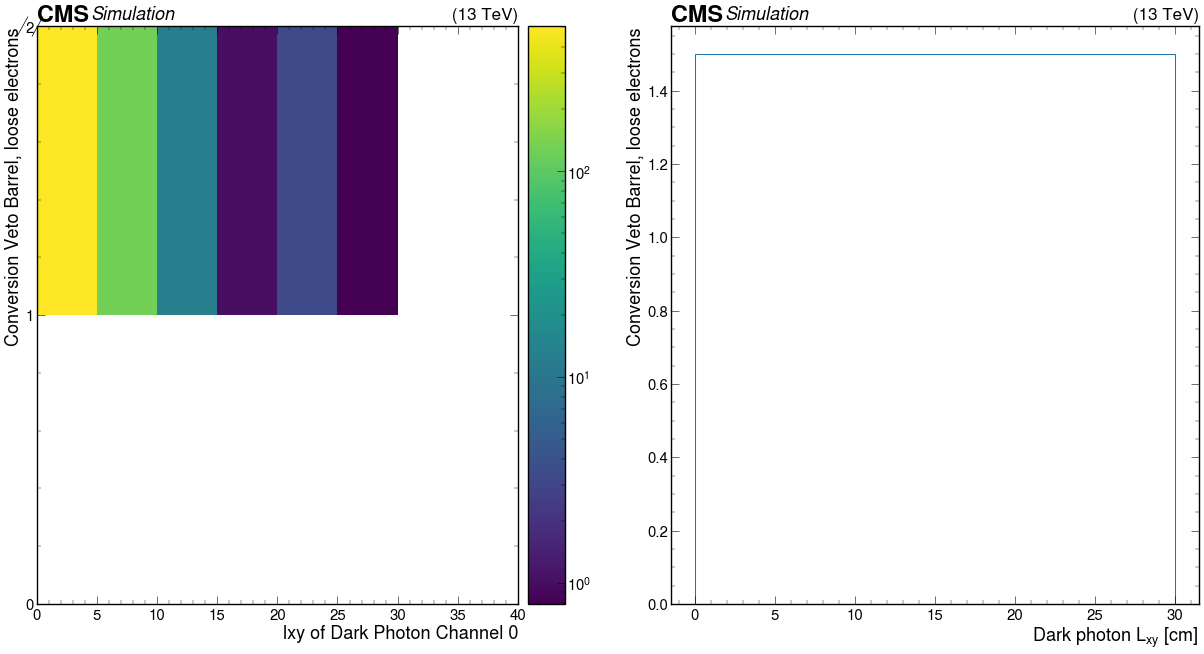

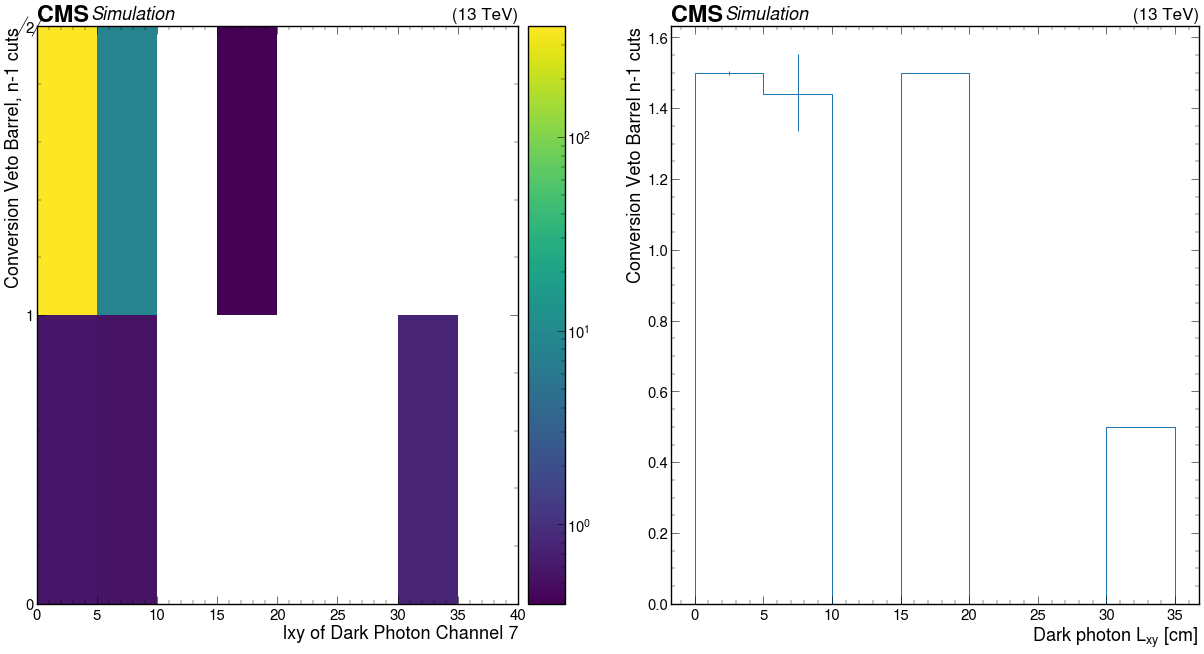

In [11]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Conversion Veto Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :40j:5j, :].profile(axis="electron_GsfEleConversionVetoCut"))  
print(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(0, 2, sum),:1]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Conversion Veto Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Conversion Veto Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0], :40j:5j, :].profile(axis="electron_GsfEleConversionVetoCut"))
#print(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(0, 2, sum),:1]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Conversion Veto Barrel, loose electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[7], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 7")
plt.ylabel("Conversion Veto Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[7], :40j:5j, :].profile(axis="electron_GsfEleConversionVetoCut")) 
#print(hists["electron_GsfEleConversionVetoCut2d"][channels[7],slice(0, 2, sum),:1]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Conversion Veto Barrel n-1 cuts")

#(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(0, 2, sum),:])

# H/E:

ratio of the energy deposited in the single closest HCAL tower to the supercluster position inside a cone of ∆R = 0.15 in the (η, φ) plane to the energy deposited at ECAL.

                     ┌───────────────────────────────────────────────────────┐
[ -inf,     0) 0     │                                                       │
[    0, 0.005) 1599  │██████████████████████████████████████████████████████ │
[0.005,  0.01) 17.78 │▋                                                      │
[ 0.01, 0.015) 65.55 │██▎                                                    │
[0.015,  0.02) 79.59 │██▊                                                    │
[ 0.02, 0.025) 72.5  │██▌                                                    │
[0.025,  0.03) 87.5  │███                                                    │
[ 0.03, 0.035) 56.28 │█▉                                                     │
[0.035,  0.04) 41.86 │█▍                                                     │
[ 0.04, 0.045) 37.38 │█▎                                                     │
[0.045,  0.05) 34.24 │█▏                                                     │
[ 0.05, 0.055) 34.94 │█▏                            

Text(0, 1, 'H/E Barrel, all electrons')

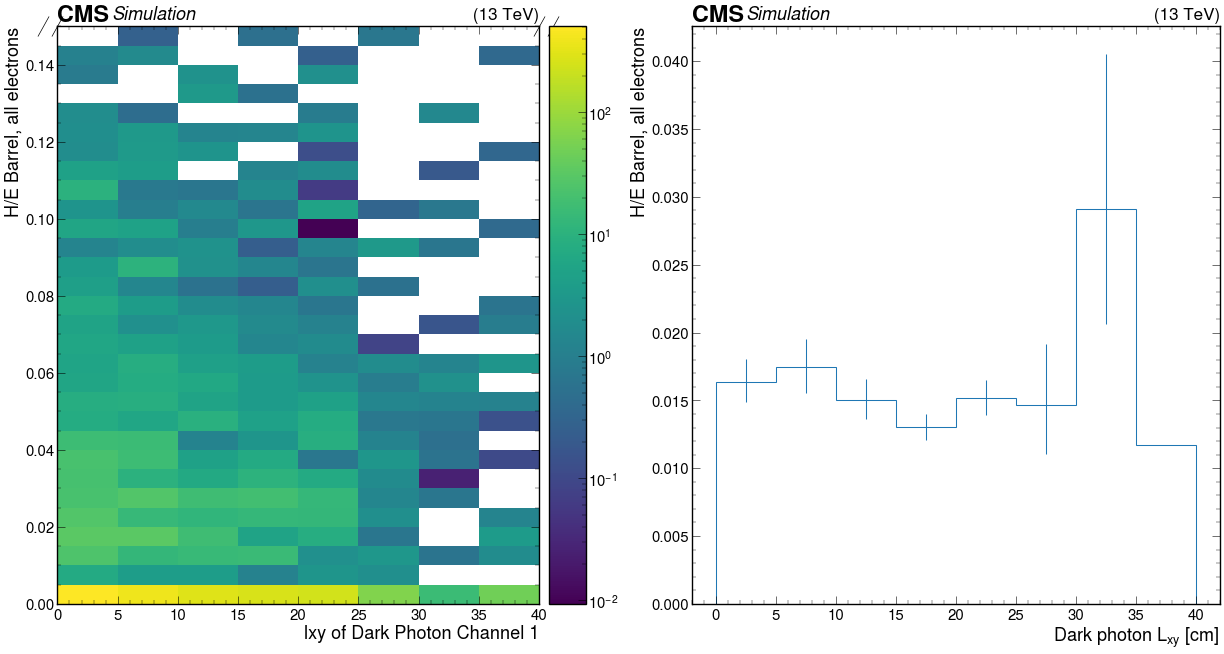

In [12]:
#Unable to define $E_SC$ for the value of H/E and therefor unable to define a bin number for H/E
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("H/E Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1], :40j:5j, :].profile(axis="electron_GsfEleHadronicOverEMEnergyScaledCut")) 
print(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("H/E Barrel, all electrons")

# Expected missing inner hits:

number of missing hits expected for GSF track.

/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(0, 1, 'Expected Missing Hits Barrel, n-1 cuts')

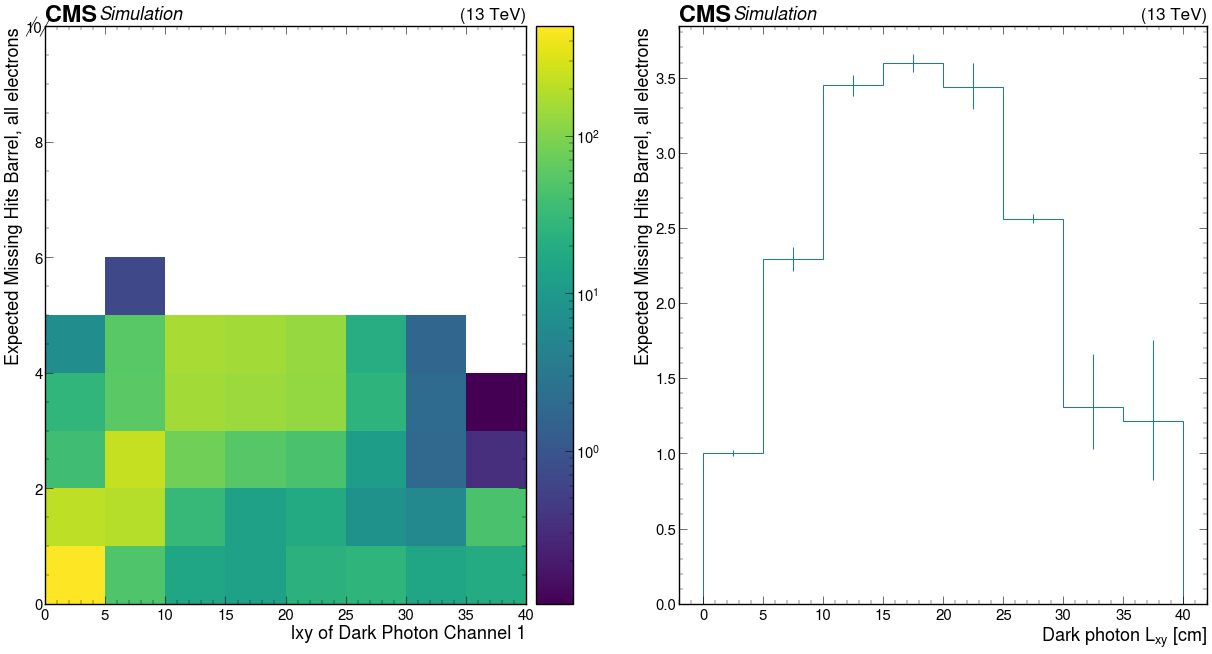

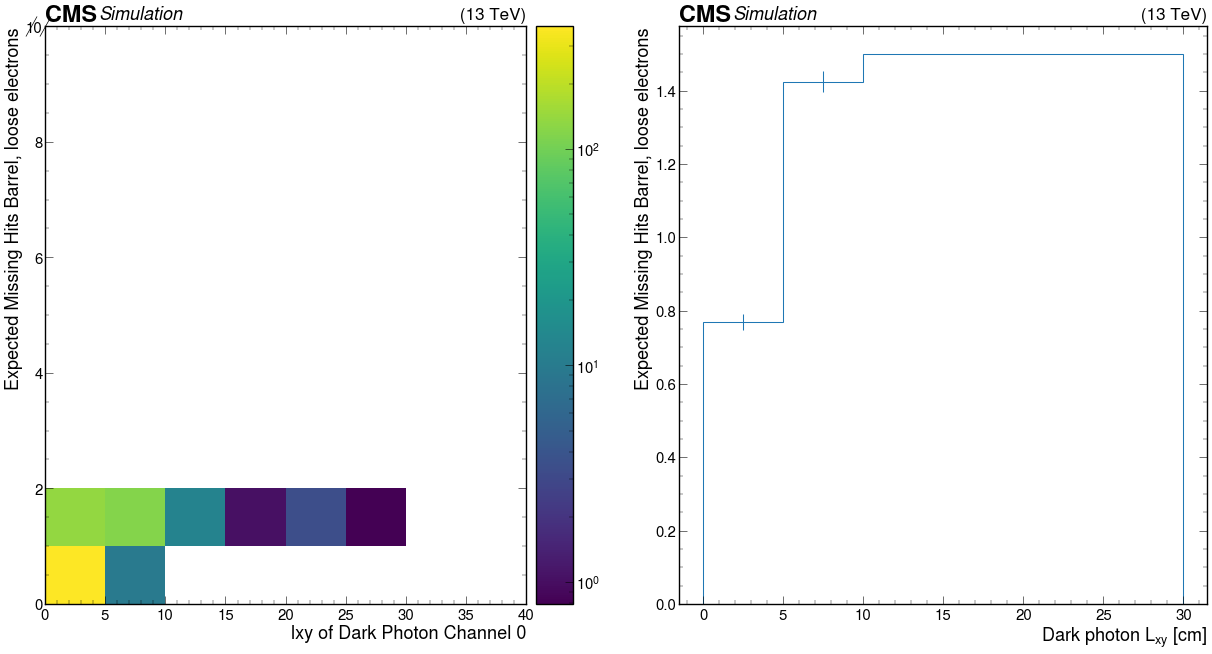

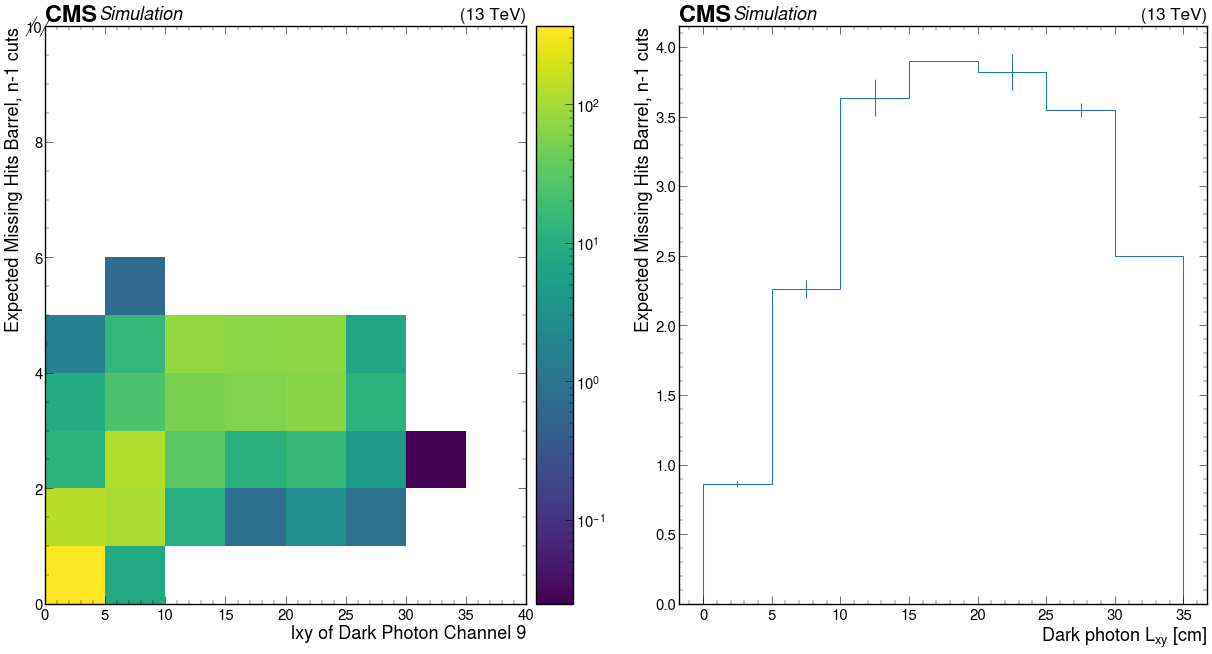

In [13]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Expected Missing Hits Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :40j:5j, :].profile(axis="electron_GsfEleMissingHitsCut"))
#print(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(0, 2, sum), 2:]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Expected Missing Hits Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0], :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Expected Missing Hits Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0], :40j:5j, :].profile(axis="electron_GsfEleMissingHitsCut"))
#print(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(0, 2, sum),2:]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Expected Missing Hits Barrel, loose electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"]["barrelE_ID-MissingHits_matched", :40j:5j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 9")
plt.ylabel("Expected Missing Hits Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"]["barrelE_ID-MissingHits_matched", :40j:5j, :].profile(axis="electron_GsfEleMissingHitsCut"))
#print(hists["electron_GsfEleMissingHitsCut2d"][channels[9],slice(0, 2, sum),2:]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Expected Missing Hits Barrel, n-1 cuts")

#(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(0, 2, sum),:])

# Percentages Failed

In [7]:
binnumdict = {
    "electron_GsfEleDEtaInSeedCut2d": 19,
    "electron_GsfEleDPhiInCut2d" : 27,
    "electron_GsfEleEInverseMinusPInverseCut2d" : 52 ,
    "electron_GsfEleFull5x5SigmaIEtaIEtaCut2d" : 16 ,
    "electron_GsfEleRelPFIsoScaledCut2d" : 23 ,
    "electron_GsfEleConversionVetoCut2d" : 1,
    "electron_GsfEleMissingHitsCut2d" : 3,
}
#binnum come from the bin number assigned in hist.py (about half), and are specifically determined from the analysis note number for each ID variable

lxy = [0,2,3,4,5,6,7,102]
#able to change Lxy
hists =  output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]
for histname, binnum in binnumdict.items() : 
    values = output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"][histname][channels[2],:,:].values(flow=True)
    print()
    print(histname)
    for i in range(0,len(lxy)-1):
# Add up all electrons in that lxy range 
        total = values[lxy[i]:lxy[i+1],:].sum()
  # Add up all electrons in that lxy range that are in a bin greater than binnum
        if histname == "electron_GsfEleConversionVetoCut2d" :
            fail = values[lxy[i]:lxy[i+1],binnum].sum()
        else: 
            fail = values[lxy[i]:lxy[i+1],binnum:].sum()
        rate = (fail/total)*100
        print(total, fail, rate)


electron_GsfEleDEtaInSeedCut2d
113.38653954304755 0.1810697466135025 0.1596924532164233
100.26943281944841 -13.424407660961151 -13.388335092244915
125.61805611941963 1.2370688039809465 0.984785819965976
12.80624309182167 0.8890590220689774 6.942387519074574
9.085308394860476 0.0 0.0
6.206547066569328 2.7402660846710205 44.151217340009694
20.005502104759216 11.876849189400673 59.367913523026374

electron_GsfEleDPhiInCut2d
113.38653954304755 0.0 0.0
100.26943281944841 0.0 0.0
125.61805611941963 0.0 0.0
12.80624309182167 0.0 0.0
9.085308394860476 0.0 0.0
6.206547066569328 0.0 0.0
20.005502104759216 0.17088939249515533 0.8542119642900716

electron_GsfEleEInverseMinusPInverseCut2d
113.38653954304755 0.0 0.0
100.26943281944841 0.0 0.0
125.61805611941963 0.0 0.0
12.80624309182167 0.0 0.0
9.085308394860476 0.0 0.0
6.206547066569328 0.0 0.0
20.005502104759216 0.0 0.0

electron_GsfEleFull5x5SigmaIEtaIEtaCut2d
113.38653954304755 0.0 0.0
100.26943281944841 0.0 0.0
125.61805611941963 0.0 0.0
12.80